In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('ml.csv', index_col='Unnamed: 0', parse_dates=['buy_date', 'sell_date'])
data = data.drop(columns = ['industry','avg'],axis = 1)
data

,sID,buy_date,buy_price,sell_date,sell_price,season,A1,A2,A3,A4,...,C6,C7,C8,D1,D2,D3,D4,D5,EPS,profit
0,1101,2020-01-02,44.10,2020-03-31,39.50,2020_Q1,0.0,1.24,2.15,0.96,...,0.02,0.04,0.16,-1.34,-13.33,-11.38,-108.76,-0.02,0.53,0.895692
1,1102,2020-01-02,48.90,2020-03-31,39.40,2020_Q1,0.0,0.67,1.22,0.38,...,0.02,0.03,0.17,-0.08,-32.22,-46.49,-151.79,0.06,0.24,0.805726
2,1103,2020-01-02,22.35,2020-03-31,15.15,2020_Q1,0.0,-0.43,-0.72,-0.60,...,0.00,0.01,0.06,1.45,9.50,183.93,-197.75,0.08,-0.33,0.677852
3,1104,2020-01-02,19.65,2020-03-31,15.80,2020_Q1,0.0,0.30,0.38,0.21,...,0.02,0.04,0.14,-3.09,5.60,566.06,-205.50,-0.01,0.07,0.804071
4,1108,2020-01-02,8.37,2020-03-31,6.31,2020_Q1,0.0,1.47,2.54,1.25,...,0.12,0.10,0.43,3.09,32.41,-517.78,-734.99,0.00,0.23,0.753883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,9943,2017-10-02,50.10,2017-12-29,52.50,2017_Q4,0.0,11.03,13.14,15.24,...,0.00,0.00,0.00,2.23,-0.81,-2.91,-0.69,0.01,4.75,1.047904
7651,9944,2017-10-02,18.50,2017-12-29,19.60,2017_Q4,0.0,1.37,2.39,1.05,...,0.00,0.00,0.00,-2.12,-7.86,-60.95,-46.44,0.00,0.42,1.059459
7652,9945,2017-10-02,28.30,2017-12-29,31.95,2017_Q4,0.0,0.99,1.97,12.67,...,0.00,0.00,0.00,44.89,-16.81,-43.94,318.11,0.34,6.90,1.128975
7653,9946,2017-10-02,10.85,2017-12-29,12.75,2017_Q4,0.0,3.04,6.73,3.72,...,0.00,0.00,0.00,5.60,-38.78,-32.34,-1.76,0.09,1.51,1.175115


In [18]:
from sklearn.model_selection import train_test_split

# clear data 將爛資料去掉
data.dropna(how='any', inplace=True)

# 選擇2019年以後的資料作為回測用
dbacktest = data[data['buy_date'] > '2019']

# 將其於的資料再分成兩類：dtrain 跟 dtest
dataTrainTest = data[data['sell_date'] < '2019']
dtrain, dtest = train_test_split(dataTrainTest, test_size=0.10, random_state=42)

# 設定我們的feature要用哪些
features = data.columns[6:-1]


In [12]:
dbacktest[['sID','profit']]

,sID,profit
0,1101,0.895692
1,1102,0.805726
2,1103,0.677852
3,1104,0.804071
4,1108,0.753883
...,...,...
3851,9943,1.108621
3852,9944,0.987730
3853,9945,1.049550
3854,9946,1.216000


In [19]:
from sklearn import preprocessing
dtrain_normalized = preprocessing.normalize(dtrain[features], norm='l2')
dtest_normalized = preprocessing.normalize(dtest[features], norm='l2')
dbacktest_normalized = preprocessing.normalize(dbacktest[features], norm='l2')

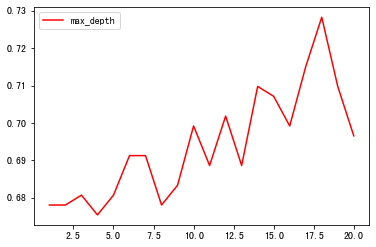

In [24]:
from sklearn.ensemble import RandomForestClassifier
import random

# 創建機器學習的model
y_eff = []
for i in range(20):
    rf = RandomForestClassifier(n_estimators=10, criterion='gini', 
                                max_depth=i+1, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features='auto', max_leaf_nodes=None, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=0, verbose=0, warm_start=False, 
                                class_weight=None)
    random.seed(10)
    tree_clf = rf.fit(dtrain_normalized,dtrain['profit'] > 1)
    score = rf.score(dtest_normalized,dtest['profit'] > 1)
    y_eff.append(score)
    
plt.plot(range(1,21),y_eff,color="red",label="max_depth")
plt.legend()
'''http://www.taroballz.com/2019/05/15/ML_decision_tree_detail/'''
plt.show()

# 分類能獲利的股票
# 用 normalised data train model
# rf.fit(dtrain_normalized, dtrain['profit'] > 1)

In [25]:
y_eff = pd.DataFrame(y_eff)
y_eff

,0
0,0.678100
1,0.678100
2,0.680739
3,0.675462
4,0.680739
5,0.691293
6,0.691293
7,0.678100
8,0.683377
9,0.699208


In [18]:
estimator_limited_5 = rf.estimators_[5]

In [19]:
estimator_limited_3 = rf.estimators_[3]

In [71]:
dtrain[features].columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'D1', 'D2', 'D3', 'D4', 'D5', 'EPS'],
      dtype=object)

In [89]:
# https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited_3, out_file='tree_limited_3_normalise.dot', feature_names = dtrain[features].columns.values,
                class_names = np.array(['True','False']),
                rounded = True, proportion = False, precision = 2, filled = True)

In [21]:
result = rf.predict(dtest_normalized)

print('test data')
print('gain before filtered', dtest['profit'].mean())
print('gain after filtered', dtest['profit'][result].mean())
print('num stocks', sum(result), '/', len(dtest))

result = rf.predict(dbacktest[features])

print('backtest data')
print('gain before filtered', dbacktest['profit'].mean())
print('gain after filtered', dbacktest['profit'][result].mean())
print('num stocks', sum(result), '/', len(dbacktest))

test data
gain before filtered 0.9793892448108161
gain after filtered 1.0307565326413022
num stocks 74 / 379
backtest data
gain before filtered 0.9890141804032317
gain after filtered 0.9853439667582728
num stocks 809 / 3840


<ipython-input-22-5d93385a2048>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbacktest['prediction'] = pd.Series(result, index=dbacktest.index)


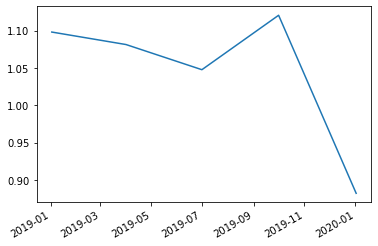

In [22]:
%matplotlib inline

dbacktest['prediction'] = pd.Series(result, index=dbacktest.index)
dates = list(set(dbacktest['buy_date']))
dates.sort()


history = []
for d in dates:
    history.append(dbacktest[(dbacktest['buy_date'] == d) & (dbacktest['prediction'])]['profit'].mean())
    
pd.Series(history, index=dates).cumprod().plot()

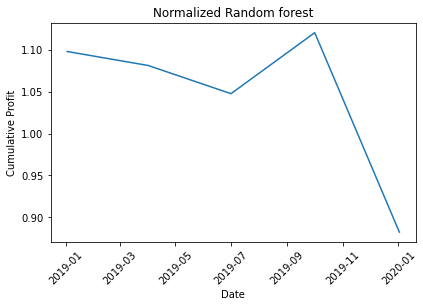

In [28]:
# 引入模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.title('Normalized Random forest')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
# plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
# 避免被圖表元素被蓋住
plt.tight_layout()
plt.plot(list(pd.Series(history, index=dates).cumprod().index), pd.Series(history, index=dates).cumprod())
plt.xticks(rotation=45)
plt.savefig('profit_ptedict_normalizedata_performance.png')
plt.show()

In [49]:
history

[1.1425715184144136,
 1.0091454945138596,
 1.0050835197227663,
 1.0995550612389944,
 0.8348566355957191]

In [51]:
list(pd.Series(history, index=dates).cumprod().index)

[Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2020-01-02 00:00:00')]

In [38]:
list(set(dbacktest['buy_date']))
# dbacktest['buy_date'].drop_duplicates()

[Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2019-10-01 00:00:00')]

In [25]:
feature

array([0.        , 0.0435837 , 0.03957496, 0.03445902, 0.02864344,
       0.03222651, 0.03292968, 0.04086644, 0.03247033, 0.03604804,
       0.03446687, 0.02642478, 0.03892678, 0.0362598 , 0.03074023,
       0.        , 0.        , 0.03019085, 0.03420649, 0.        ,
       0.03017915, 0.03761276, 0.04281894, 0.02130259, 0.02906215,
       0.03130816, 0.03792186, 0.03931149, 0.0526474 , 0.05611183,
       0.0365035 , 0.03320224])

In [47]:
features_df = pd.DataFrame(features)
feature_df = pd.DataFrame(feature)
feature_df = pd.concat([features_df,feature_df], axis = 1)
feature_df.columns = ['index', 'feature importances']
# feature_df

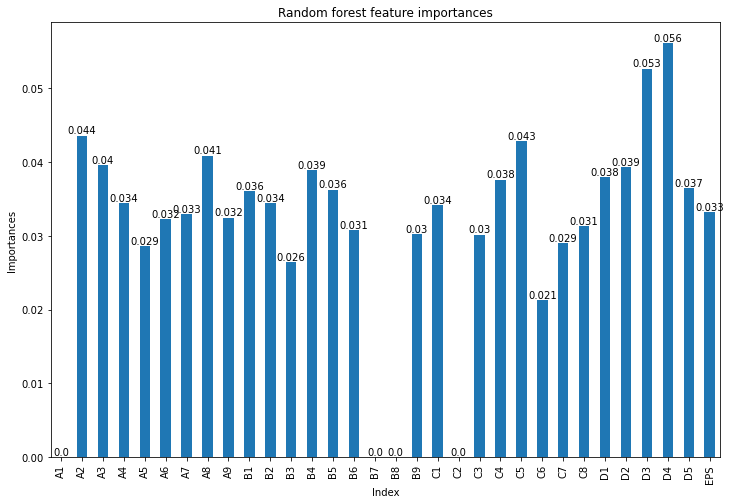

In [46]:
feature = rf.feature_importances_

feature_series = pd.Series(feature)

plt.figure(figsize = (12,8))
ax = feature_series.plot(kind = 'bar')
ax.set_title('Random forest feature importances')
ax.set_xlabel('Index')
ax.set_ylabel('Importances')
ax.set_xticklabels(features)

rects = ax.patches
labels = [round(i,3) for i in list(feature)]


for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
           ha = 'center', va = 'bottom')

plt.savefig('Feature_importances.png')
# plt.plot(features,feature)
